In [1]:
import pandas as pd

train=pd.read_csv('train.csv')
train

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [2]:
test=pd.read_csv('test.csv')
test

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
4995,This is the kind of picture John Lassiter woul...,1
4996,A MUST SEE! I saw WHIPPED at a press screening...,1
4997,NBC should be ashamed. I wouldn't allow my chi...,0
4998,This movie is a clumsy mishmash of various gho...,0


In [3]:
comments_train=train.text
y_train=train.label

comments_test=test.text
y_test=test.label

In [4]:
import numpy as np 
print('Samples per class in training set: ',np.bincount(y_train))

Samples per class in training set:  [20019 19981]


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe=make_pipeline(TfidfVectorizer(min_df=5,norm=None),LogisticRegression(max_iter=1000,C=10))
param={'tfidfvectorizer__ngram_range':[(1,1),(1,2),(1,3)]}

from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipe,param,cv=5)
grid.fit(comments_train,y_train)
print('Best accuracy on training set: ',grid.best_score_)
print('Best parameter ',grid.best_params_)

import warnings
warnings.filterwarnings('ignore')

Best accuracy on training set:  0.9112500000000001
Best parameter  {'tfidfvectorizer__ngram_range': (1, 3)}


In [35]:
vector=TfidfVectorizer(min_df=5,norm=None,ngram_range=(1,3))
vector.fit(comments_train)
X_train=vector.transform(comments_train)

logreg=LogisticRegression(max_iter=1000,C=10)
logreg.fit(X_train,y_train)

X_test=vector.transform(comments_test)
print('Accuracy on test set:',logreg.score(X_test,y_test))

Accuracy on test set: 0.9104


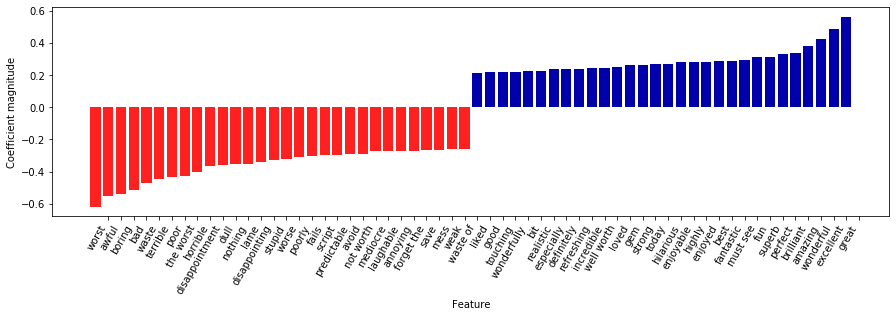

In [34]:
import mglearn

mglearn.tools.visualize_coefficients(logreg.coef_,np.array(vector.get_feature_names()),n_top_features=30)